<a href="https://colab.research.google.com/github/phmorris610/ClassificationModels/blob/master/TitanicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk as nltk
from sklearn.svm._libsvm import predict_proba


class Classification:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def extraTree(self, n):
        from sklearn.ensemble import ExtraTreesClassifier
        import matplotlib.pyplot as plt
        model = ExtraTreesClassifier()
        model.fit(self.X, self.y)
        feat_importances = pd.Series(model.feature_importances_, index=self.X.columns)
        feat_importances.nlargest(n).plot(kind='barh')
        plt.show()
        feat = []
        feat.append(feat_importances.nlargest(n))
        return feat

    def normal(self, feature):
        import matplotlib.pyplot as plt
        plt.hist(self.X[feature], bins=20, edgecolor='black')
        plt.show()

    def reg(self):
        from sklearn.linear_model import LinearRegression
        import matplotlib.pyplot as plt
        linreg_model = LinearRegression()
        linreg_model.fit(self.X, self.y)
        import statsmodels.api as sm
        regModel = sm.OLS(self.y, self.X).fit()
        y_pred = linreg_model.predict(self.X)
        # and a residual plot
        plt.title('Residulas')
        plt.scatter(regModel.model.exog[:, 1], regModel.resid)
        plt.show()
        mse_linreg = ((y_pred ** 2).mean())
        print("MSE = ", mse_linreg)
        print("rMSE = ", np.sqrt(mse_linreg))
        return regModel.summary()  # finally return a Regression Summary


class DecisionTree(Classification):
    def __init__(self, X, y):
        super().__init__(X, y)

    def decision(self, n, feat):
        from sklearn.tree import DecisionTreeClassifier
        from sklearn import tree
        import matplotlib.pyplot as plt
        clf = tree.DecisionTreeClassifier(max_depth=n)  # set hyperparameter
        clf.fit(self.X, self.y)
        plt.figure(figsize=(12, 12))  # set plot size (denoted in inches)
        tree.plot_tree(clf, feature_names=feat, class_names=True, filled=True, fontsize=10)
        plt.title('Survival on the Titanic')
        plt.show()


class RandomForest(Classification):
    def __init__(self, X, y):
        super().__init__(X, y)

    def rForestClass(self, Xval, yval, n):
        from sklearn.ensemble import RandomForestClassifier
        import matplotlib.pyplot as plt
        from sklearn import metrics
        from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
        # fig, axs = plt.subplots(nrows=1, ncols=2)
        clf = RandomForestClassifier(n_estimators=n)
        clf.fit(self.X, self.y)
        y_pred = clf.predict(self.X)
        print("RF Accuracy on Training Data: ", metrics.accuracy_score(self.y, y_pred) * 100, "%")
        display = ConfusionMatrixDisplay(confusion_matrix(self.y, y_pred), display_labels=['True', 'False'])
        display.plot()
        plt.title('Training')
        predictions = clf.predict(Xval)
        print("RF Accuracy on Validation Data: ", metrics.accuracy_score(yval, predictions) * 100, "%")
        display2 = ConfusionMatrixDisplay(confusion_matrix(yval, predictions), display_labels=['True', 'False'])
        display2.plot()
        plt.title('Validation')
        plt.show()
        print('')

    def rForestReg(self, n, state):
        from sklearn.ensemble import RandomForestRegressor
        from sklearn import metrics
        regr = RandomForestRegressor(max_depth=n, random_state=state)
        regr.fit(self.X, self.y)
        y_pred = regr.predict(self.X)
        print("Accuracy: ", metrics.accuracy_score(self.y, y_pred))


class NiaveBayes(Classification):
    def __init__(self, X, y):
        super().__init__(X, y)

    def gBayes(self, Xval, yval):
        from sklearn.naive_bayes import GaussianNB
        from sklearn.metrics import accuracy_score, r2_score
        gnb = GaussianNB()
        gnb.fit(self.X, self.y)
        y_pred = gnb.predict(self.X)
        print('Gaussian NB Training Accuracy', accuracy_score(self.y, y_pred, sample_weight=None) * 100, '% ',
              'R^2', r2_score(self.y, y_pred, sample_weight=None))
        predictions_g = gnb.predict(Xval)
        print('Gaussian NB Validation Accuracy', accuracy_score(yval, predictions_g, sample_weight=None) * 100,
              '%', 'R^2', r2_score(yval, predictions_g, sample_weight=None))
        print('')

    def mBayes(self, Xval, yval):
        from sklearn.naive_bayes import MultinomialNB
        from sklearn.metrics import accuracy_score, r2_score
        mnb = MultinomialNB()
        mnb.fit(self.X, self.y)
        y_pred = mnb.predict(self.X)
        print('Multinomial NB Training Accuracy', accuracy_score(self.y, mnb.predict(self.X), sample_weight=None)*100,
        '% ', 'R^2', r2_score(self.y, y_pred, sample_weight=None))
        predictions_m = mnb.predict(Xval)
        print('Multinomial NB Validation Accuracy', accuracy_score(yval, predictions_m, sample_weight=None)*100, '% '
              , 'R^2', r2_score(yval, predictions_m, sample_weight=None))
        print('')

    def compBayes(self, Xval, yval):
        from sklearn.naive_bayes import ComplementNB
        from sklearn.metrics import accuracy_score, r2_score
        cnb = ComplementNB()
        cnb.fit(self.X, self.y)
        y_pred = cnb.predict(self.X)
        print('Complement NB Training Accuracy', accuracy_score(self.y, cnb.predict(self.X), sample_weight=None)*100,
        '% ', 'R^2', r2_score(self.y, y_pred, sample_weight=None))
        predictions_comp = cnb.predict(Xval)
        print('Complement NB Validation Accuracy Score', accuracy_score(yval, predictions_comp, sample_weight=None)*100,
              '% ', 'R^2', r2_score(yval, predictions_comp, sample_weight=None))
        print('')

    def bBayes(self, Xval, yval):
        from sklearn.naive_bayes import BernoulliNB
        from sklearn.metrics import accuracy_score, r2_score
        bnb = BernoulliNB()
        bnb.fit(self.X, self.y)
        y_pred = bnb.predict(self.X)
        print('Bernoulli NB Training Accuracy', accuracy_score(self.y, bnb.predict(self.X), sample_weight=None)*100,
              '% ', 'R^2', r2_score(self.y, y_pred, sample_weight=None))
        predictions_bern = bnb.predict(Xval)
        print('Bernoulli NB Validation Accuracy', accuracy_score(yval, predictions_bern, sample_weight=None)*100,
              '% ', 'R^2', r2_score(yval, predictions_bern, sample_weight=None))
        print('')

    def catBayes(self, Xval, yval):
        from sklearn.naive_bayes import CategoricalNB
        from sklearn.metrics import accuracy_score, r2_score
        cnb = CategoricalNB()
        cnb.fit(self.X, self.y)
        y_pred = cnb.predict(self.X)
        print('Categorical NB Training Accuracy', accuracy_score(self.y, cnb.predict(self.X), sample_weight=None)*100,
              '% ', 'R^2', r2_score(self.y, y_pred, sample_weight=None))
        predictions_cat = cnb.predict(Xval)
        print('Categorical NB Validation Accuracy', accuracy_score(yval, predictions_cat, sample_weight=None)*100,
              '% ', 'R^2', r2_score(yval, predictions_cat, sample_weight=None))
        print('')


In [2]:
"""Import and wrangle the Titanic Dataset"""
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()


train_df = pd.read_csv('titanic3.csv')
"""Look at your data"""
# print("train_df.shape: ", train_df.shape)
# print(train_df.columns)
# print(train_df.describe())
null_entries = train_df.isnull().sum()
# print(null_entries)
"""With practically all cabin columns being zero we can safely remove them, plus it's safe to say if you were wealthy
you were probably traveling first class which will show in ticket and fare"""
train_df.drop(columns=["Cabin"], inplace=True)
"""Age and embarked have missing values, age seems important so lets remove rows with missing Age/Embarked values
then reset the index"""
train_df.dropna(axis=0, inplace=True)
train_df.reset_index(inplace=True)
"""check shape of data after removing those rows/cols, we went from 891 to 712 rows, not bad"""
# print(train_df.shape)
X = train_df.copy()  # X values, aka observations, explanatory variables, independent variables
y = X.pop("Survived")  # the y value, aka the response, the dependent variable
"""Now let's encode the categoricals"""
for colname in X.select_dtypes('object').columns:
    X[colname], _ = X[colname].factorize()
""" We can see sex and age are the most important features, lets make a list, we can remove passID and index"""
featured_selections = ['Fare', 'Age', 'Sex', 'Ticket']
X_feat = X[featured_selections].copy()
"""Now the data is set, and it's clean, lets select some features"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, random_state=1)
f = Classification(X_train, y_train)
# print(f.extraTree(12))
feature_names = X.columns
labels = y.unique()
feature_names2 = X_feat.columns
f1 = Classification(X_feat, y)
f2 = Classification(X_test, y_test)
# print(f1.extraTree(10))
"""We can see removing these variable actually resulted in a stronger relation from these to the y
Lets quick check if the data is normal"""
# print(f.normal('Sex'))
"""not exactly, lets see the regression output"""
# print(f1.reg())
"""The residuals look great, but judging from those p-Values we can remove Name at least, lets do that then see
Well removing those variable really tossed a wrench in but improved the R^2 greatly, lets remove SibSp
The residuals are still symmetric but now Age Pclass and Embarked have very high p-values, lets remove pclass/embarked
With or without the variable Age the R^2 and MSE remain steady so this is puzzling the p-Value of age remains high
I will keep it because the residuals with Age look far nicer"""



Saving titanic3.csv to titanic3.csv


'The residuals look great, but judging from those p-Values we can remove Name at least, lets do that then see\nWell removing those variable really tossed a wrench in but improved the R^2 greatly, lets remove SibSp\nThe residuals are still symmetric but now Age Pclass and Embarked have very high p-values, lets remove pclass/embarked\nWith or without the variable Age the R^2 and MSE remain steady so this is puzzling the p-Value of age remains high\nI will keep it because the residuals with Age look far nicer'

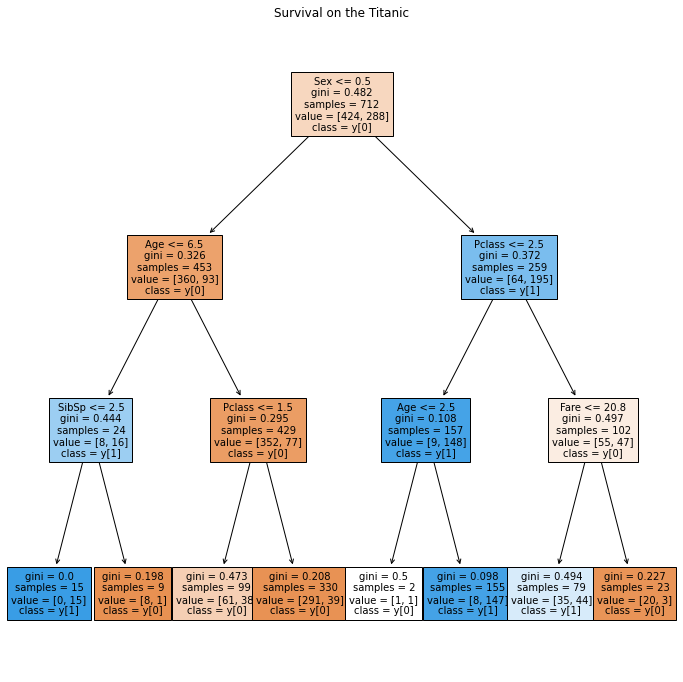

In [3]:
"""Let's check out a decision tree"""
t = DecisionTree(X, y)
t.decision(3, feature_names)



RF Accuracy on Training Data:  98.76977152899823 %
RF Accuracy on Validation Data:  76.22377622377621 %


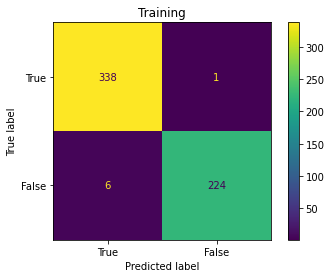

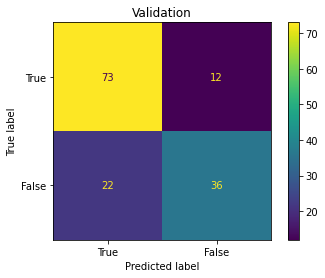

'wow 98% (false positives are an issue) but on the validation? Not so fast we only have ~75%'

In [5]:
"""Now the Random Forest"""
r = RandomForest(X_train, y_train)
r.rForestClass(X_test, y_test, 10)
"""wow 98% (false positives are an issue) but on the validation? Not so fast we only have ~75%"""



In [6]:
"""Lets try the Niave Bayes"""
b = NiaveBayes(X_train, y_train)
b.compBayes(X_test, y_test)
b.gBayes(X_test, y_test)
b.mBayes(X_test, y_test)
b.catBayes(X_test, y_test)
b.bBayes(X_test, y_test)
"""There is quite alot of variety here but the Categorical Naive Bayes is most comparable to the Random Forest, with
a training accuracy of 91% and validation accuracy of 73%"""

Complement NB Training Accuracy 65.02636203866432 %  R^2 -0.4522380402718993
Complement NB Validation Accuracy Score 61.53846153846154 %  R^2 -0.5953346855983777

Gaussian NB Training Accuracy 78.20738137082601 %  R^2 0.0950878543029372
Gaussian NB Validation Accuracy 75.52447552447552 % R^2 -0.015212981744422205

Multinomial NB Training Accuracy 64.8506151142355 %  R^2 -0.45953571886623035
Multinomial NB Validation Accuracy 61.53846153846154 %  R^2 -0.5953346855983777

Categorical NB Training Accuracy 91.21265377855887 %  R^2 0.6351160702834424
Categorical NB Validation Accuracy 73.42657342657343 %  R^2 -0.1022312373225156

Bernoulli NB Training Accuracy 78.38312829525483 %  R^2 0.10238553289726837
Bernoulli NB Validation Accuracy 76.22377622377621 %  R^2 0.013793103448275557



'There is quite alot of variety here but the Categorical Naive Bayes is most comparable to the Random Forest, with\na training accuracy of 91% and validation accuracy of 73%'